# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

> **Disclaimer:** This notebook was AI-generated with the goal of assisting researchers in exploring Dandiset 001375. While it aims to demonstrate data loading and basic visualization techniques using the DANDI API and PyNWB, the code and interpretations have not been fully verified by human experts. Please review the code carefully and use caution when interpreting the results or building upon this analysis.

## Dandiset Overview

This notebook explores Dandiset [001375](https://dandiarchive.org/dandiset/001375), titled "Septum GABA disruption with DREADDs".

**Description from Metadata:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

**Contributors:** Eckert, Michael; NIH Brain; McNaughton, Bruce; Ferbinteanu, Janina

**Citation:** Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025) Septum GABA disruption with DREADDs (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001375/draft

This notebook demonstrates how to:
*   Connect to the DANDI archive and retrieve information about the Dandiset.
*   List the assets (files) within the Dandiset.
*   Select and load data from a specific NWB (Neurodata Without Borders) file using `remfile`, `h5py`, and `pynwb`.
*   Explore and visualize key data components within the NWB file, including:
    *   Trial information (durations).
    *   Raw extracellular electrophysiology recordings.
    *   Sorted spike times (units).
    *   Electrode geometry.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed in your environment.

*   `dandi` (for interacting with the DANDI Archive API)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for PyNWB, used for HDF5 file access)
*   `remfile` (for streaming remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced plotting styles)
*   `pandas` (for handling tabular data like electrode information)

## Loading Dandiset Information

In [1]:
# Import necessary libraries
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn theme for plots
sns.set_theme()

Connect to the DANDI archive using the `DandiAPIClient` and retrieve information about Dandiset 001375.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001375"
dandiset = client.get_dandiset(dandiset_id)

# Print basic information about the Dandiset using metadata retrieved via the API
metadata = dandiset.get_raw_metadata()
print(f"Dandiset ID: {dandiset_id}")
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'https://dandiarchive.org/dandiset/' + dandiset_id)}") # Construct URL if not present

# List the assets in the Dandiset
print("\nListing assets...")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset.")
print("\nAssets:")
for asset in assets:
    print(f"- Path: {asset.path}, Size: {asset.size} bytes, Asset ID: {asset.identifier}") # Changed asset.asset_id to asset.identifier

Dandiset ID: 001375
Dandiset name: Septum GABA disruption with DREADDs
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Listing assets...
Found 3 assets in the dataset.

Assets:
- Path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb, Size: 54970745645 bytes, Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb, Size: 69445661969 bytes, Asset ID: 376dc673-611b-4521-b135-9ec01c7f4f74
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb, Size: 69788881498 bytes, Asset ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16


## Loading Data from a Specific NWB File

This Dandiset contains multiple NWB files representing different subjects or sessions. For demonstration purposes, we will focus on the first asset listed:

`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

The Asset ID is `ce525828-8534-4b56-9e47-d2a34d1aa897`. We can construct the download URL for this asset.

In [3]:
# Define the URL for the chosen NWB asset
nwb_asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
nwb_file_path = "sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb" # For reference

print(f"Selected NWB file path: {nwb_file_path}")
print(f"NWB file download URL: {nwb_file_url}")

Selected NWB file path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
NWB file download URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


You can also explore this specific NWB file interactively using NeuroSift by visiting the following link:

[Explore on NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

Now, let's load the NWB file using `remfile` (to stream the remote data without downloading the entire large file), `h5py`, and `pynwb`.

In [4]:
# Load the remote NWB file
# This cell might take a moment as it establishes the connection and reads metadata.
print(f"Loading NWB file from: {nwb_file_url}")
print("Please wait, this may take a few moments...")

try:
    remote_file = remfile.File(nwb_file_url)
    h5_file = h5py.File(remote_file, 'r') # Readonly mode
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True) # Readonly mode, load namespaces
    nwb = io.read()
    print("NWB file loaded successfully.")
    nwb_loaded = True
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb_loaded = False

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
Please wait, this may take a few moments...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


## Exploring NWB File Contents

If the file loaded successfully, we can examine some of its metadata and components.

In [5]:
if nwb_loaded:
    # Display some basic metadata from the loaded NWB file
    print(f"Session Description: {getattr(nwb, 'session_description', 'N/A')}")
    print(f"Identifier: {getattr(nwb, 'identifier', 'N/A')}")
    print(f"Session Start Time: {getattr(nwb, 'session_start_time', 'N/A')}")
    print(f"Subject ID: {getattr(nwb.subject, 'subject_id', 'N/A') if nwb.subject else 'N/A'}")
    print(f"Subject Species: {getattr(nwb.subject, 'species', 'N/A') if nwb.subject else 'N/A'}")
    
    # List known top-level groups/tables in the file
    print("\nNWB File Top-Level Contents (Examples):")
    known_attributes = ['acquisition', 'intervals', 'units', 'electrodes', 'electrode_groups', 'devices', 'trials', 'subject']
    for attr in known_attributes:
        if hasattr(nwb, attr):
            value = getattr(nwb, attr)
            if value is not None:
                 print(f"- {attr}: {type(value)}")
            # else:
            #    print(f"- {attr}: (None)") # Optionally show None attributes
    print("...") # Indicate there might be more
else:
    print("Skipping NWB content exploration due to loading error.")

Session Description: mouse running laps in virtual hallway
Identifier: MS13B
Session Start Time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject Species: Mus musculus

NWB File Top-Level Contents (Examples):
- acquisition: <class 'hdmf.utils.LabelledDict'>
- intervals: <class 'hdmf.utils.LabelledDict'>
- units: <class 'pynwb.misc.Units'>
- electrodes: <class 'hdmf.common.table.DynamicTable'>
- electrode_groups: <class 'hdmf.utils.LabelledDict'>
- devices: <class 'hdmf.utils.LabelledDict'>
- trials: <class 'pynwb.epoch.TimeIntervals'>
- subject: <class 'pynwb.file.Subject'>
...


### Trial Information

The NWB file format allows storing information about experimental trials, often including start and stop times. Let's examine the `trials` table.

Found 'trials' table with columns: ('start_time', 'stop_time')
Number of trials: 387
Calculated durations for 387 trials.


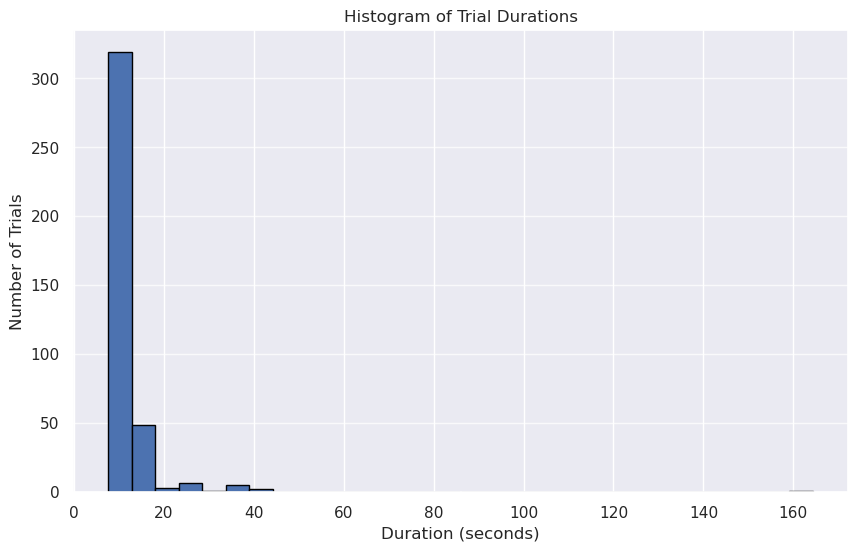

In [6]:
if nwb_loaded and hasattr(nwb, 'trials') and nwb.trials is not None:
    trials = nwb.trials
    print(f"Found 'trials' table with columns: {trials.colnames}")
    print(f"Number of trials: {len(trials.start_time)}")

    # Calculate trial durations
    # We load the start/stop times into numpy arrays first
    start_times = trials.start_time[:]
    stop_times = trials.stop_time[:]
    
    if len(start_times) > 0 and len(start_times) == len(stop_times):
        durations = stop_times - start_times
        print(f"Calculated durations for {len(durations)} trials.")
        
        # Plot histogram of trial durations
        plt.figure(figsize=(10, 6))
        plt.hist(durations, bins=30, edgecolor='black')
        plt.title('Histogram of Trial Durations')
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Number of Trials')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print("Could not calculate durations (missing times or mismatched lengths).")
        
else:
     print("Skipping trials analysis: 'trials' table not found or NWB not loaded.")

The histogram shows the distribution of trial lengths. In this dataset, most trials appear to be relatively short, with a tail of longer trials (right-skewed distribution).

### Raw Electrophysiology Data

Raw voltage recordings are often stored in `acquisition`. This file contains a `TimeSeries` object likely holding the multichannel data. Let's access it and visualize a small time segment for a few channels.

**Note:** This dataset is very large (tens of GB). We will only load a tiny fraction (1 second, 5 channels) to demonstrate access patterns. Loading large amounts of raw data remotely can be slow.

Accessed 'time_series' under acquisition.
Data shape: (144675584, 256) (samples, channels)
Sampling rate: 30000.0 Hz
Data type: int16
Units: mV

Loading 1.0s (30000 samples) for the first 5 channels...


Loaded data subset with shape: (30000, 5)


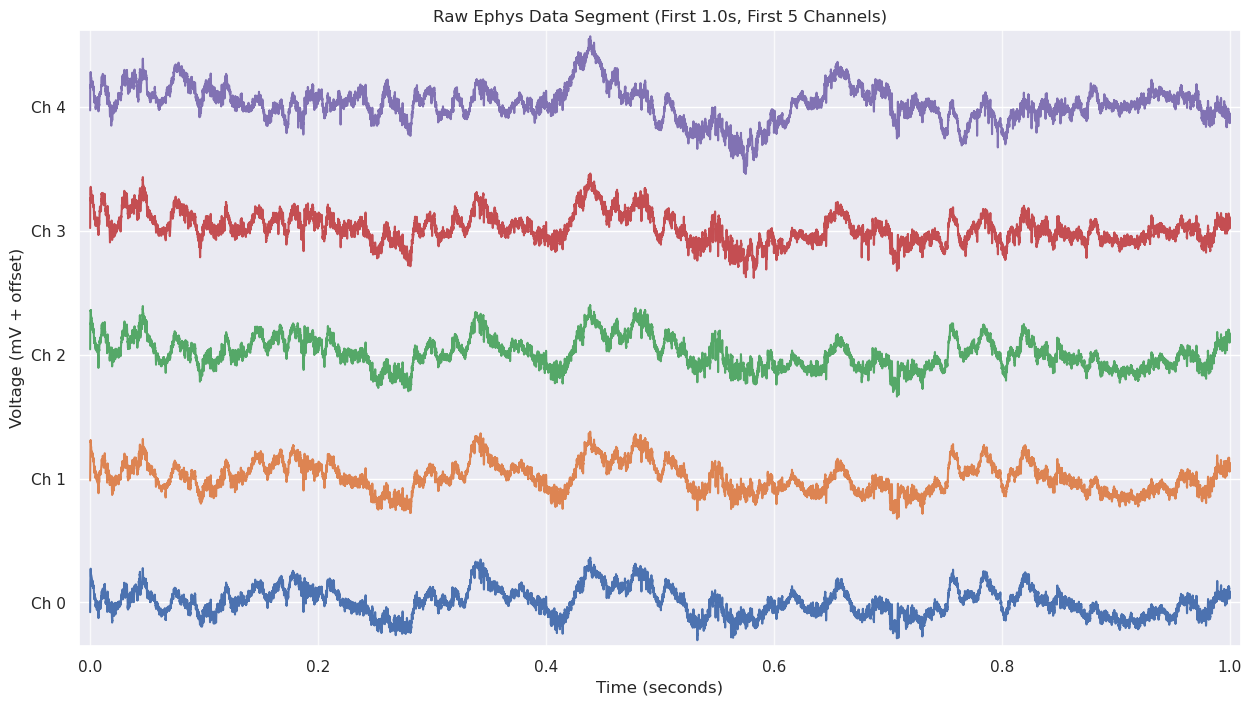

In [7]:
if nwb_loaded and 'time_series' in nwb.acquisition:
    ts = nwb.acquisition['time_series']
    print(f"Accessed 'time_series' under acquisition.")
    print(f"Data shape: {ts.data.shape} (samples, channels)")
    print(f"Sampling rate: {ts.rate} Hz")
    print(f"Data type: {ts.data.dtype}")
    print(f"Units: {ts.unit}")

    # Define parameters for loading a subset
    duration_to_load = 1.0  # seconds
    num_channels_to_load = 5
    sampling_rate = ts.rate
    num_samples_to_load = int(duration_to_load * sampling_rate)

    print(f"\nLoading {duration_to_load}s ({num_samples_to_load} samples) for the first {num_channels_to_load} channels...")
    
    try:
        # Load the data subset directly from the HDF5 dataset
        data_subset = ts.data[0:num_samples_to_load, 0:num_channels_to_load]
        print(f"Loaded data subset with shape: {data_subset.shape}")

        # Data is int16, convert to float for potential scaling and plotting
        data_subset_mv = data_subset.astype(float)
        # Check conversion/offset if needed (here, unit is mV, conversion 1.0, offset 0.0 -> already in mV)
        
        # Create timestamps for the loaded segment
        timestamps = np.arange(num_samples_to_load) / sampling_rate

        # Create the plot
        plt.figure(figsize=(15, 8))
        
        # Add a vertical offset for clarity
        offset_scale = np.ptp(data_subset_mv[:, 0]) * 1.5 if np.ptp(data_subset_mv[:, 0]) > 0 else 1.0
        offsets = np.arange(num_channels_to_load) * offset_scale

        for i in range(num_channels_to_load):
            plt.plot(timestamps, data_subset_mv[:, i] + offsets[i]) # Removed label for cleaner plot
            
        plt.title(f'Raw Ephys Data Segment (First {duration_to_load}s, First {num_channels_to_load} Channels)')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Voltage (mV + offset)')
        # Label y-axis ticks with channel numbers instead of voltage values
        plt.yticks(offsets, [f'Ch {i}' for i in range(num_channels_to_load)]) 
        plt.grid(axis='x', alpha=0.75)
        plt.margins(x=0.01, y=0.01)
        plt.show()

    except Exception as e:
        print(f"Error loading or plotting raw data segment: {e}")

else:
    print("Skipping raw data analysis: 'time_series' not found in acquisition or NWB not loaded.")

The plot above shows the voltage traces for the first second of recording on the first 5 channels. Each trace is offset vertically for better visibility. We can observe voltage fluctuations, likely representing neural activity like local field potentials (LFP) or background noise.

### Units (Spike Times)

Processed data, such as the times when individual neurons (units) fired action potentials (spikes), are typically stored in the `units` table. Let's visualize the spike times for a subset of units using a raster plot.

Accessed 'units' table with columns: ('spike_times',)
Total number of units found: 33

Preparing raster plot for the first 10 units (IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) up to 60.0 seconds.


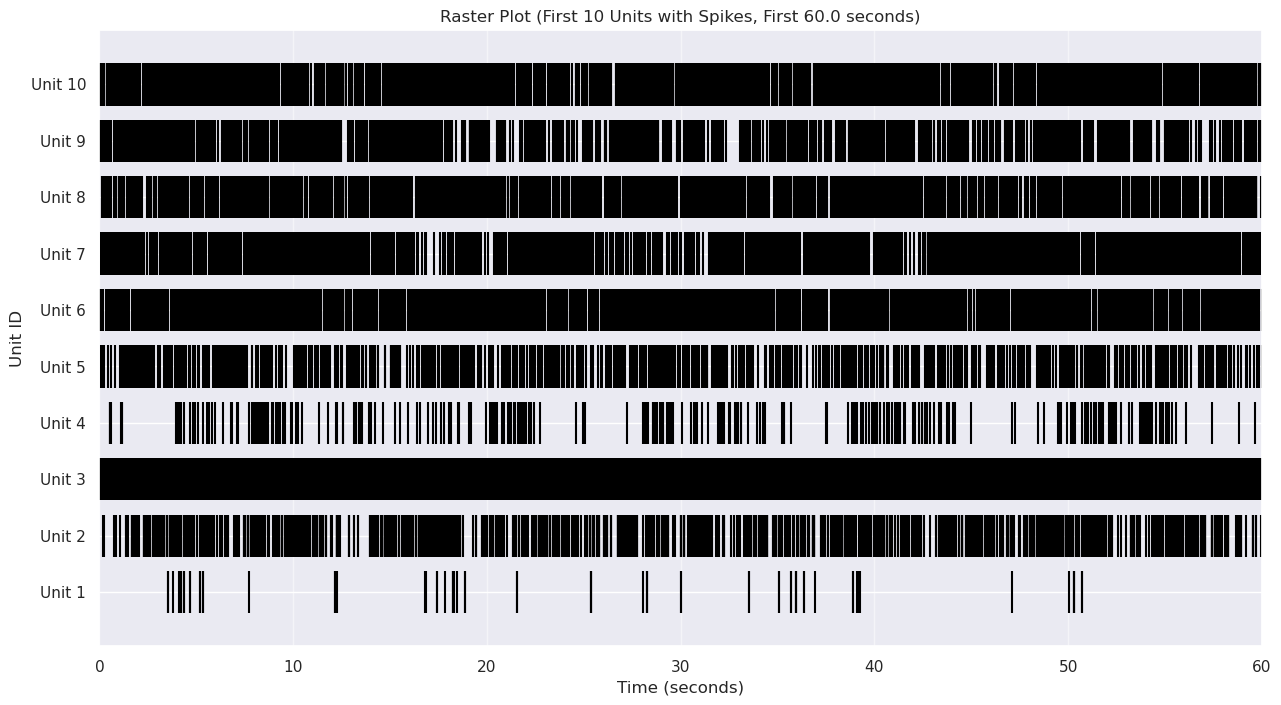

In [8]:
if nwb_loaded and hasattr(nwb, 'units') and nwb.units is not None:
    units = nwb.units
    print(f"Accessed 'units' table with columns: {units.colnames}")
    num_total_units = len(units.id)
    print(f"Total number of units found: {num_total_units}")

    # Define parameters for plotting
    num_units_to_plot = min(10, num_total_units) # Plot up to 10 units
    time_limit = 60.0  # Plot first 60 seconds
    
    # Get the actual IDs of the units we are targeting
    unit_ids_to_plot = units.id[:num_units_to_plot]
    print(f"\nPreparing raster plot for the first {num_units_to_plot} units (IDs: {list(unit_ids_to_plot)}) up to {time_limit} seconds.")

    # Collect spike times for selected units within the time limit
    spike_times_list = []
    unit_plot_indices = [] # Y-values for the raster plot (0, 1, 2...)
    actual_unit_ids_plotted = [] # Actual unit IDs corresponding to plot indices

    for i, unit_id in enumerate(unit_ids_to_plot):
        try:
            # Find the internal index corresponding to the unit_id
            unit_index = np.where(units.id[:] == unit_id)[0][0]
            
            # Get spike times using the VectorIndex efficiently
            start_idx = units.spike_times_index.data[unit_index-1] if unit_index > 0 else 0
            end_idx = units.spike_times_index.data[unit_index]
            unit_spike_times = units.spike_times.data[start_idx:end_idx]

            # Filter by time limit
            unit_spike_times_filtered = unit_spike_times[unit_spike_times <= time_limit]
            
            if len(unit_spike_times_filtered) > 0:
                spike_times_list.append(unit_spike_times_filtered)
                unit_plot_indices.append(i) # Use loop index for y-position
                actual_unit_ids_plotted.append(unit_id) # Store the corresponding ID
                # print(f"Unit ID {unit_id}: Found {len(unit_spike_times_filtered)} spikes <= {time_limit}s.")
            # else:
                # print(f"Unit ID {unit_id}: No spikes found <= {time_limit}s.")

        except Exception as e:
            print(f"Error processing unit ID {unit_id}: {e}")

    # Create and display the raster plot if data was found
    if not spike_times_list:
        print("No spikes found for the selected units in the specified time range.")
    else:
        plt.figure(figsize=(15, 8))
        plt.eventplot(spike_times_list, linelengths=0.75, colors='black', lineoffsets=unit_plot_indices)
        # Use the collected actual unit IDs for the y-axis labels
        plt.yticks(unit_plot_indices, [f'Unit {uid}' for uid in actual_unit_ids_plotted]) 
        plt.xlabel('Time (seconds)')
        plt.ylabel('Unit ID')
        plt.title(f'Raster Plot (First {len(actual_unit_ids_plotted)} Units with Spikes, First {time_limit} seconds)')
        plt.xlim(0, time_limit)
        plt.grid(axis='x', alpha=0.5)
        plt.margins(y=0.02) 
        plt.show()

else:
    print("Skipping units analysis: 'units' table not found or NWB not loaded.")

The raster plot shows each spike as a vertical tick mark. Each row represents a different putative neuron (unit). This visualization helps understand the firing patterns of individual neurons and potential correlations across the population over time. Note that some units have very high firing rates, appearing as dense black lines.

### Electrode Information

NWB files store metadata about the electrodes used for recording, including their locations and grouping (e.g., which shank they belong to). This is stored in the `electrodes` table.

Accessed 'electrodes' table with columns: ('x', 'y', 'location', 'filtering', 'group', 'group_name', 'label')
Total number of electrodes: 256

First 5 rows of electrodes table:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x14061...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x14061...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x14061...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x14061...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x14061...     shank1   

                  label

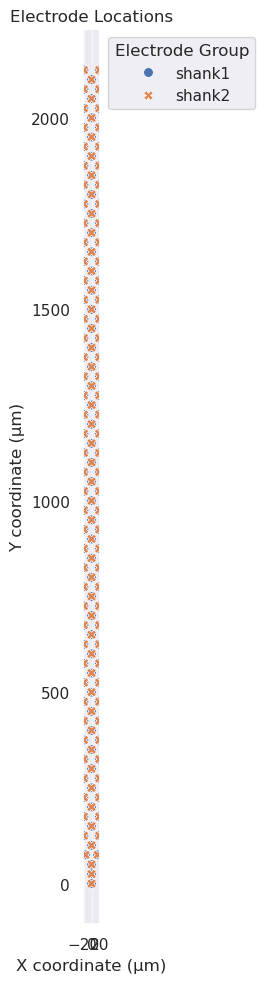

In [9]:
if nwb_loaded and hasattr(nwb, 'electrodes') and nwb.electrodes is not None:
    electrodes = nwb.electrodes
    print(f"Accessed 'electrodes' table with columns: {electrodes.colnames}")
    num_electrodes = len(electrodes.id)
    print(f"Total number of electrodes: {num_electrodes}")

    # Using pandas DataFrame is convenient for plotting electrode properties
    try:
        electrodes_df = electrodes.to_dataframe()
        print("\nFirst 5 rows of electrodes table:")
        print(electrodes_df.head())

        # Check if 'x', 'y', and 'group_name' columns exist for plotting
        if 'x' in electrodes_df.columns and 'y' in electrodes_df.columns and 'group_name' in electrodes_df.columns:
            print("\nPlotting electrode locations...")
            plt.figure(figsize=(8, 10))
            sns.scatterplot(data=electrodes_df, x='x', y='y', hue='group_name', style='group_name', s=50)
            plt.title('Electrode Locations')
            plt.xlabel('X coordinate (µm)') # Use µ symbol
            plt.ylabel('Y coordinate (µm)')
            plt.legend(title='Electrode Group', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.gca().set_aspect('equal', adjustable='box') # Ensure aspect ratio is equal for geometry
            plt.grid(True, alpha=0.5)
            plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
            plt.show()
        else:
            print("\nCould not plot electrode locations: Missing 'x', 'y', or 'group_name' columns.")

    except Exception as e:
        print(f"\nError processing or plotting electrodes table: {e}")

else:
    print("Skipping electrodes analysis: 'electrodes' table not found or NWB not loaded.")

The scatter plot displays the spatial layout of the recording electrodes, often grouped by probe shanks (as seen here with 'shank1' and 'shank2'). This helps visualize the physical arrangement of the recording sites relative to each other.

## Summary and Future Directions

This notebook demonstrated how to access and perform basic exploration of Dandiset 001375 using the DANDI API and PyNWB. We loaded metadata, selected a specific NWB file, and visualized several key data types:
*   **Trials:** Showed how to access trial start/stop times and visualize their duration distribution.
*   **Raw Ephys:** Demonstrated loading and plotting a small segment of the high-resolution voltage recordings.
*   **Units:** Showed how to access spike times for sorted units and create a raster plot to visualize firing patterns.
*   **Electrodes:** Illustrated how to access electrode metadata and plot their spatial geometry.

**Future Directions:**
*   **Deeper Analysis:** Perform more in-depth analysis of spike trains (e.g., firing rates, inter-spike intervals, cross-correlations) or LFP signals (e.g., spectral analysis, coherence).
*   **Behavioral Correlation:** If behavioral data were available and synchronized (not obvious in this file's basic structure), correlate neural activity with specific behavioral events or states.
*   **Across Sessions/Subjects:** Extend the analysis to compare data across different NWB files within the Dandiset, if applicable.
*   **DREADDs Effect:** Investigate potential differences in neural activity patterns related to the experimental manipulation (DREADDs activation targeting septal GABAergic neurons), although identifying specific epochs related to the manipulation requires further information about the experimental design not readily apparent in the basic NWB structure explored here.

Remember to close the HDF5 file handle when finished.

In [10]:
# Close the NWB file resources
if nwb_loaded and 'io' in locals() and io is not None:
    try:
        io.close()
        print("NWB file resources closed.")
    except Exception as e:
        print(f"Error closing NWB file: {e}")

NWB file resources closed.


In [11]:
print("Notebook execution finished.")

Notebook execution finished.
